<a href="https://colab.research.google.com/github/lujainAziz/LujainAlmajyul-it326/blob/main/Reports%20Folder/phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ========= PHASE 3 SETUP: load preprocessed dataset =========
import os
import pandas as pd
import numpy as np

repo_url = "https://github.com/lujainAziz/LujainAlmajyul-it326.git"
repo_path = "/content/LujainAlmajyul-it326"

# 1) Clone repo if not exists
if not os.path.exists(repo_path):
    !git clone {repo_url}

# 2) Load PREPROCESSED dataset from Dataset/Preprocessed_dataset.csv
preprocessed_path = os.path.join(repo_path, "Dataset", "Preprocessed_dataset.csv")

if not os.path.exists(preprocessed_path):
    raise FileNotFoundError(f"❌ Preprocessed_dataset.csv not found at: {preprocessed_path}")

df = pd.read_csv(preprocessed_path)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt

# نختار الـ features اللي نبي نستخدمها للتصنيف
feature_cols_clf = [
    "Age", "Gender", "Ethnicity", "ParentalEducation",
    "StudyTimeWeekly_transformed",
    "Absences_scaled",
    "Tutoring", "ParentalSupport",
    "Extracurricular", "Sports", "Music", "Volunteering",
    "GPA_scaled"
]

X = df[feature_cols_clf].copy()
y = df["GradeClass"].astype(int)   # الكلاس: 0..4

print("X shape:", X.shape)
print("y value counts:\n", y.value_counts())

X shape: (2392, 13)
y value counts:
 GradeClass
4    1211
3     414
2     391
1     269
0     107
Name: count, dtype: int64


In [3]:
partition_sizes = [0.6, 0.7, 0.8]  # 60%, 70%, 80% تدريب
criteria = ["gini", "entropy"]

results_clf = []

for train_size in partition_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        train_size=train_size,
        random_state=42,
        stratify=y
    )

    for crit in criteria:
        clf = DecisionTreeClassifier(
            criterion=crit,
            random_state=42
        )
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        print("=" * 80)
        print(f"Train size = {int(train_size*100)}%  |  Test size = {int((1-train_size)*100)}%")
        print(f"Criterion = {crit}")
        print("Accuracy:", round(acc, 4))
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        print(cm)

        results_clf.append({
            "train_size": f"{int(train_size*100)}% train / {int((1-train_size)*100)}% test",
            "criterion": crit,
            "accuracy": acc
        })

Train size = 60%  |  Test size = 40%
Criterion = gini
Accuracy: 0.8307

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.44      0.51        43
           1       0.69      0.77      0.72       108
           2       0.81      0.88      0.84       156
           3       0.78      0.81      0.80       166
           4       0.91      0.87      0.89       484

    accuracy                           0.83       957
   macro avg       0.76      0.75      0.75       957
weighted avg       0.83      0.83      0.83       957

Confusion Matrix:
[[ 19   3   6   5  10]
 [  3  83   8   7   7]
 [  1   2 137  12   4]
 [  1   7   3 135  20]
 [  7  26  16  14 421]]
Train size = 60%  |  Test size = 40%
Criterion = entropy
Accuracy: 0.8401

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.47      0.47        43
           1       0.70      0.80      0.74       108
           2       0.

In [10]:
results_clf_df = pd.DataFrame(results_clf)
results_clf_df



,train_size,criterion,accuracy
0,60% train / 40% test,gini,0.830721
1,60% train / 40% test,entropy,0.840125
2,70% train / 30% test,gini,0.855153
3,70% train / 30% test,entropy,0.832869
4,80% train / 19% test,gini,0.868476
5,80% train / 19% test,entropy,0.860125


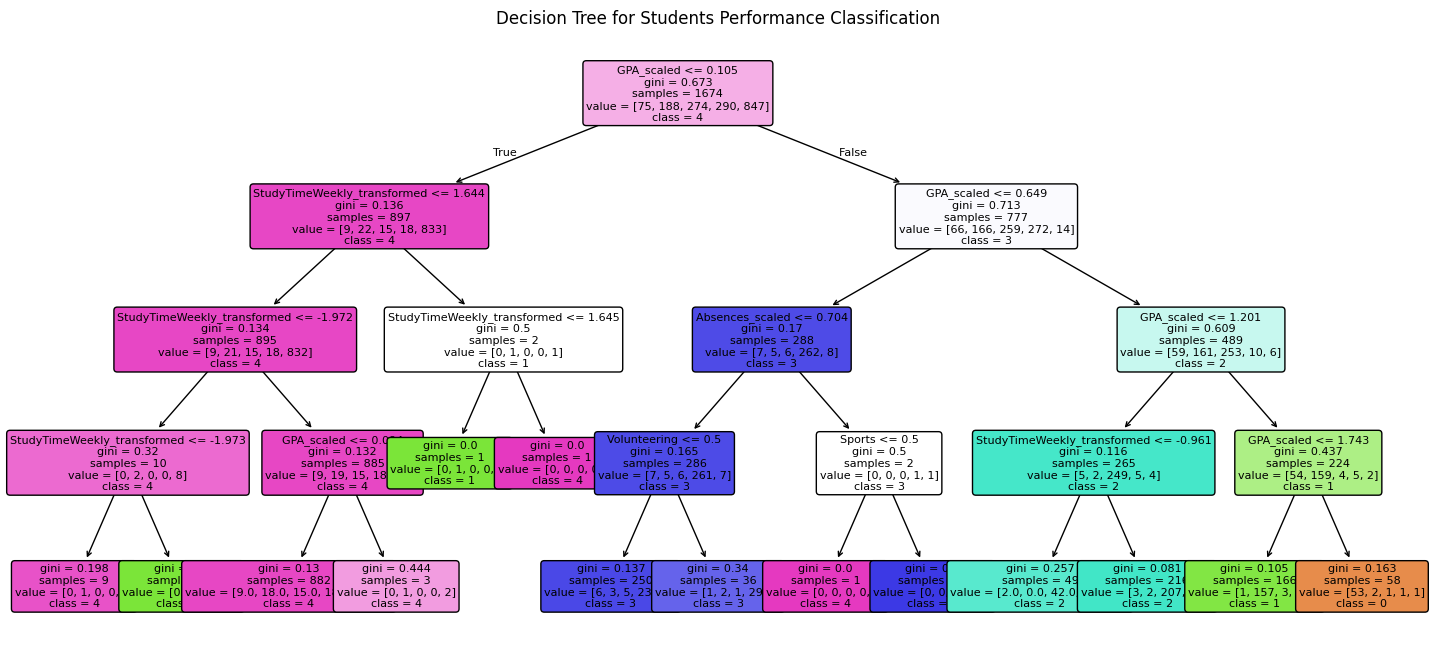

In [5]:
# إعادة تقسيم ب70/30
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.7,
    random_state=42,
    stratify=y
)

best_clf = DecisionTreeClassifier(
    criterion="gini",   # أو "entropy"
    random_state=42,
    max_depth=4
)
best_clf.fit(X_train, y_train)

plt.figure(figsize=(18, 8))
plot_tree(
    best_clf,
    feature_names=feature_cols_clf,
    class_names=[str(c) for c in sorted(y.unique())],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree for Students Performance Classification")
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ما نستخدم GradeClass هنا (unsupervised)
cluster_features = [
    "Age", "Gender", "Ethnicity", "ParentalEducation",
    "StudyTimeWeekly_transformed",
    "Absences",
    "Tutoring", "ParentalSupport",
    "Extracurricular", "Sports", "Music", "Volunteering",
    "GPA"
]

X_clu = df[cluster_features].copy()

scaler = StandardScaler()
X_clu_scaled = scaler.fit_transform(X_clu)

pca = PCA(n_components=2)
X_clu_pca = pca.fit_transform(X_clu_scaled)

print("X_clu_scaled shape:", X_clu_scaled.shape)

X_clu_scaled shape: (2392, 13)


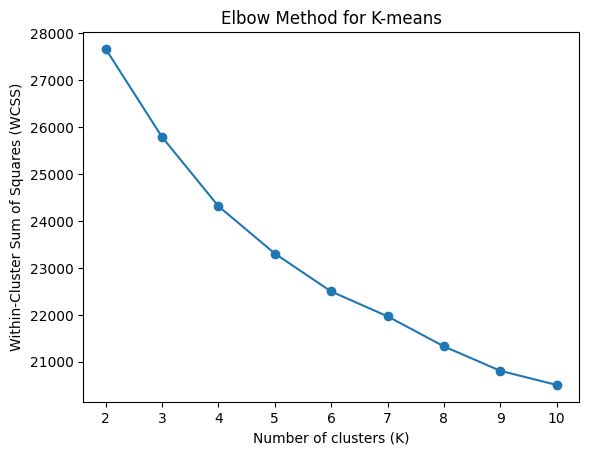

In [7]:
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_clu_scaled)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(list(K_range), inertias, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for K-means")
plt.show()

K = 2, Silhouette Score = 0.1047
K = 3, Silhouette Score = 0.1104
K = 4, Silhouette Score = 0.1090
K = 5, Silhouette Score = 0.0948
K = 6, Silhouette Score = 0.0855
K = 7, Silhouette Score = 0.0748
K = 8, Silhouette Score = 0.0898
K = 9, Silhouette Score = 0.0820
K = 10, Silhouette Score = 0.0728


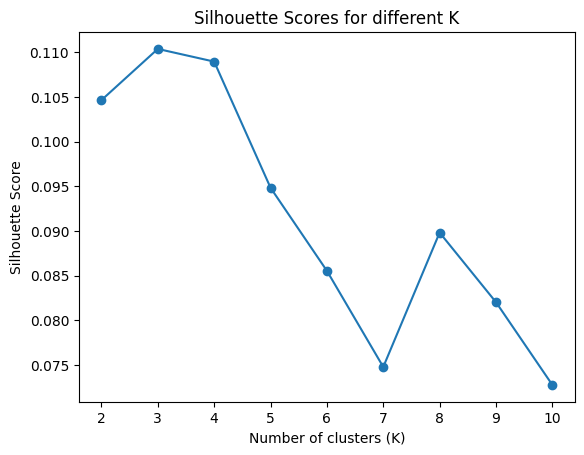

In [8]:
sil_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_clu_scaled)
    sil = silhouette_score(X_clu_scaled, labels)
    sil_scores.append(sil)
    print(f"K = {k}, Silhouette Score = {sil:.4f}")

plt.figure()
plt.plot(list(K_range), sil_scores, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for different K")
plt.show()

K = 2
Average Silhouette: 0.1047
Total Within-Cluster Sum of Squares (WCSS): 27664.93


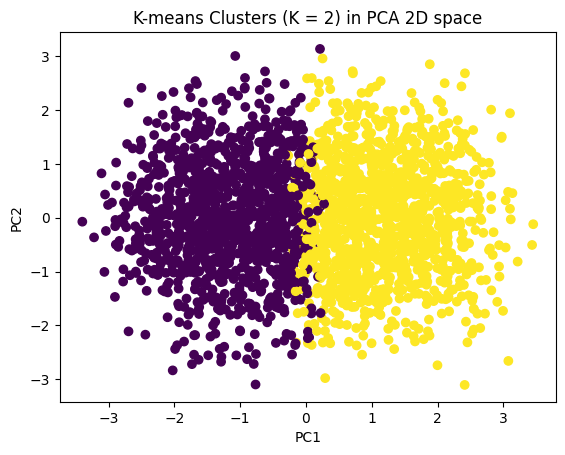

K = 3
Average Silhouette: 0.1104
Total Within-Cluster Sum of Squares (WCSS): 25787.61


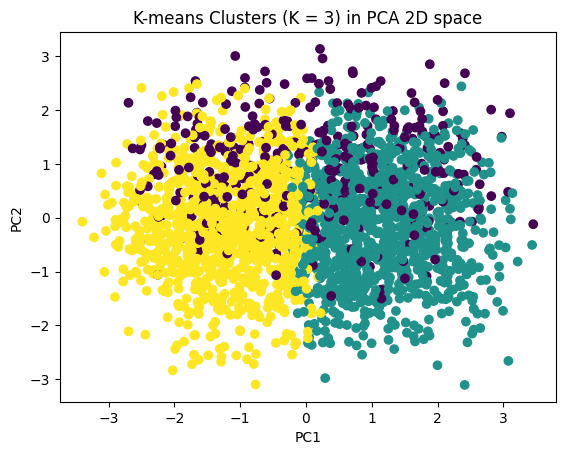

K = 4
Average Silhouette: 0.109
Total Within-Cluster Sum of Squares (WCSS): 24313.96


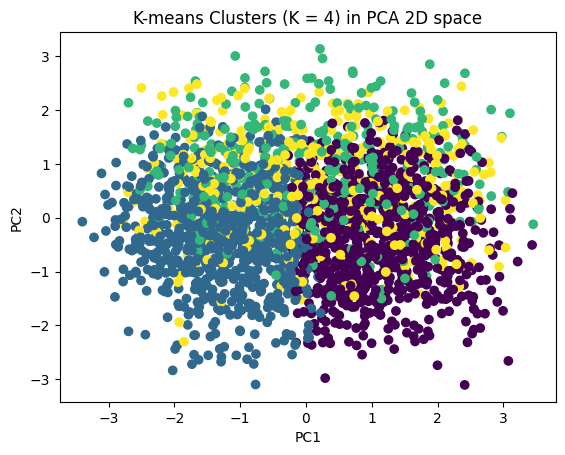

,K,silhouette,wcss
0,2,0.104654,27664.931040
1,3,0.110386,25787.609258
2,4,0.108965,24313.963012


In [9]:
chosen_K = [2, 3, 4]  # عدليها حسب اللي يطلع لك أفضل

cluster_results = []

for k in chosen_K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_clu_scaled)

    sil = silhouette_score(X_clu_scaled, labels)
    inertia = kmeans.inertia_

    cluster_results.append({
        "K": k,
        "silhouette": sil,
        "wcss": inertia
    })

    print("=" * 60)
    print(f"K = {k}")
    print("Average Silhouette:", round(sil, 4))
    print("Total Within-Cluster Sum of Squares (WCSS):", round(inertia, 2))

    # Visualization in PCA space
    plt.figure()
    plt.scatter(X_clu_pca[:, 0], X_clu_pca[:, 1], c=labels)
    plt.title(f"K-means Clusters (K = {k}) in PCA 2D space")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

cluster_results_df = pd.DataFrame(cluster_results)
cluster_results_df